In [0]:
#Data preprocessing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
df_train=pd.read_csv("Google_Stock_Price_Train.csv")

In [0]:
#selecting the CLOSE column
train_set=df_train.iloc[:,1:2].values

In [39]:
train_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [0]:
#Feature scaling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
train_set_scaled=sc.fit_transform(train_set)

In [41]:
train_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [0]:
#Number of timesteps - 60 timessteps. 
#i.e at to predict stock price at timestep T+1 we have to look back at T to T-60 days stock price 

x_train=[] #contain previous 60days stock price
y_train=[] #contain next day stock price
for i in range(60,1258):  # one can begin from the 60th stock price till the total rows
   x_train.append(train_set_scaled[i-60:i,0]) #storing the 60 previous stock prices in x_train (first iteration : 0 to 59)
   y_train.append(train_set_scaled[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)

In [43]:
x_train
#first row is for predicting stock price at T=60
#second row is for predicting stock price at T=61 and so on
#There are total 60columns (0--59) 

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [44]:
y_train
#first row is the stock price at T=60
#second row is the stock price at T=61 and so on

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [0]:
#Reshaping data --> helps adds indicators which you think helps predict even better the trends of Google stock price
#x_train=np.reshape(x_train,(no.of observations, no.of timesteps, no.of indicators))
x_train=np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))

In [0]:
#Building the LSTM
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [0]:
#Initializing
regressor=Sequential()

In [0]:
#Adding first LSTM layer with some dropout regularization
#units=50 for high dimentionality
#return_sequence=True if you have another LSTM layer following this layer
regressor.add(LSTM(units=50, return_sequences=True, input_shape = (x_train.shape[1],1) ))
regressor.add(Dropout(rate=0.2))

In [0]:
#Adding second LSTM layer with some dropout regularization
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(rate=0.2))

In [0]:
#Adding third LSTM layer with some dropout regularization
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(rate=0.2))

In [0]:
#Adding fourth LSTM layer with some dropout regularization
#return_sequence=False as there are no more LSTM layer following this layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(rate=0.2))

In [0]:
#Output Layer
#units = Dimension if the output layer
regressor.add(Dense(units=1))

In [0]:
#Compliling the model
regressor.compile(optimizer="adam", loss="mean_squared_error")

In [54]:
regressor.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
1198/1198 [==============================] - 24s 20ms/step - loss: 0.0539
Epoch 2/100
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0063
Epoch 3/100
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0057
Epoch 4/100
1198/1198 [==============================] - 20s 16ms/step - loss: 0.0053
Epoch 5/100
1198/1198 [==============================] - 20s 16ms/step - loss: 0.0054
Epoch 6/100
1198/1198 [==============================] - 20s 16ms/step - loss: 0.0052
Epoch 7/100
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0047
Epoch 8/100
1198/1198 [==============================] - 20s 16ms/step - loss: 0.0049
Epoch 9/100
1198/1198 [==============================] - 20s 16ms/step - loss: 0.0048
Epoch 10/100
1198/1198 [==============================] - 20s 16ms/step - loss: 0.0042
Epoch 11/100
1198/1198 [==============================] - 20s 16ms/step - loss: 0.0044
Epoch 12/100
1198/1198 [============================

In [0]:
#Making predictions
df_test=pd.read_csv("Google_Stock_Price_Test.csv")
test_set=df_test.iloc[:,1:2].values

In [0]:
dataset_total=pd.concat((df_train["Open"],df_test["Open"]),axis=0)
inputs=dataset_total[len(dataset_total)-len(df_test)-60:].values

In [0]:
inputs=inputs.reshape(-1,1)

In [0]:
inputs_scaled=sc.transform(inputs)

In [0]:
x_test=[] 
for i in range(60,80):  # 80 because 60(previous 2016 data)+20(test set data for 20days)
   x_test.append(inputs_scaled[i-60:i,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))

In [0]:
y_pred=regressor.predict(x_test)
y_pred=sc.inverse_transform(y_pred)

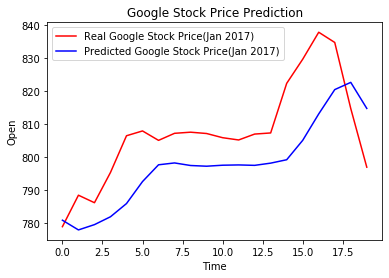

In [71]:
#plotting
plt.plot(test_set,color="red",label="Real Google Stock Price(Jan 2017)")
plt.plot(y_pred,color="blue",label="Predicted Google Stock Price(Jan 2017)")
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Open")
plt.legend()
plt.show()